## <font style='font-size: 30px;'> Avaliação do modelo de segunda ordem </font> <hr style='line: 2px solid;'>

A função de transferência média da planta de pressão é dada por, segundo a análise feita é:

$$
\zeta = 0.3346 \\
\omega_n = 4.4971 \\
k = 1.3885
$$

O que nos dá a seguinte função transferência:

$$
G(s) \approx 1.3885 \cdot \frac{20.223}{s^2 + 3s + 20.223}
$$

É uma função de segunda ordem com a seguinte resposta:


                  planta de pressão fechada
RiseTime                            0.1799
SettlingTime                        2.4825
SettlingMin                         0.4367
SettlingMax                         0.8715
Overshoot                          49.9097
Undershoot                          0.0000
Peak                                0.8715
PeakTime                            0.4677
SteadyStateValue                    0.5813
Erro(%)                             0.4187


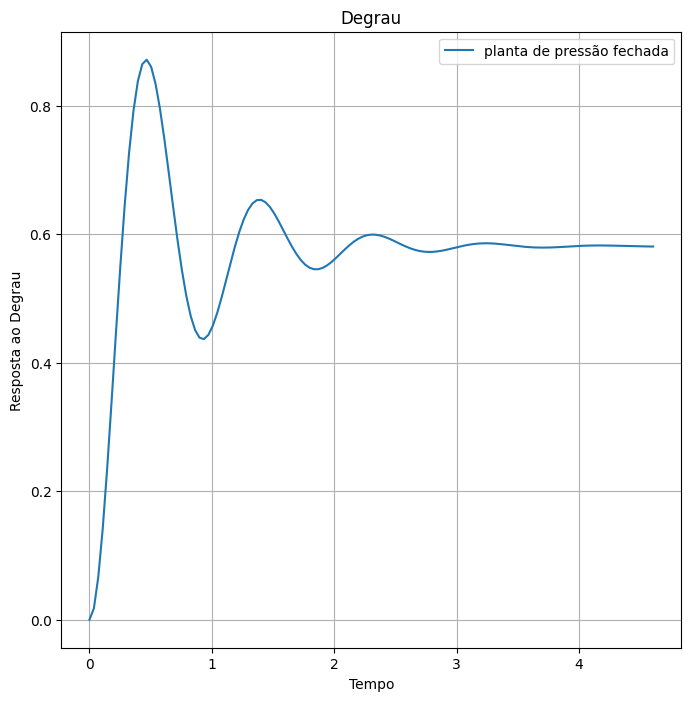

In [3]:
planta_pressao = ct.TransferFunction([28.0796],[1, 3, 20.223])
planta_pressao_fechada = ct.feedback(planta_pressao, 1)
parametros = obter_plot_degrau({'planta de pressão fechada':planta_pressao_fechada}, amortecimento=0.02)
parametros

requisitos definidos:

- $e_{ss} = 0.02$
- $T_s(5\%) < 1s$
- $M_p < 20 \%$

## <font style='font-size: 30px;'> Análise lugar das raízes — Compensador de avanço </font> <hr style='line: 2px solid;'>

O procedimento pelo lugar das raizes consiste no seguinte:

<font style='font-size: 20px;'> 1. Encontre um ganho para garantir seu erro e verifique se ajustando consegue garantir os requisitos </font> <hr style='line: 2px solid;'>

A primeira coisa que iremos fazer é resolver nosso requisito de erro no estado estacionário. Ele é calculado para degrau unitário e é proporcional a uma constante $K_p$, em sistemas do tipo 0 — que é o caso. Logo:

$$e_{ss} = 0.02 = \frac{1}{1+K_p} → K_p = 49$$

O ganho do controlador deve ser:

$$ K_c = \frac{K}{K_p} → \frac{1.3885}{49} → \boxed{K_c = 35.2899} $$

Vê-se abaixo que de fato garantimos o erro, mas nenhum dos outros requisitos. Então vamos para o projeto do compensador.


                  planta de pressão fechada
RiseTime                            0.0395
SettlingTime                        2.5830
SettlingMin                         0.2517
SettlingMax                         1.8188
Overshoot                          85.5919
Undershoot                          0.0000
Peak                                1.8188
PeakTime                            0.1027
SteadyStateValue                    0.9800
Erro(%)                             0.0200


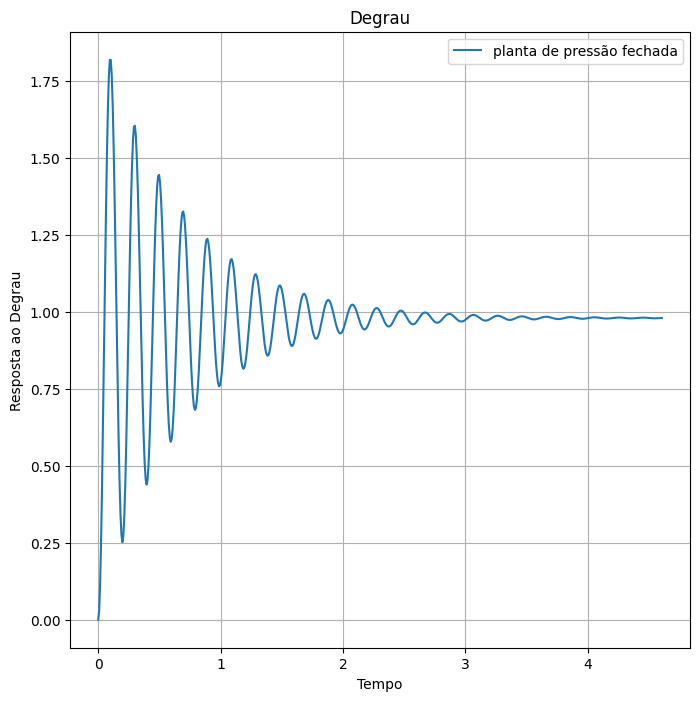

In [10]:
planta_pressao_aberta_ganho_kc = ct.TransferFunction([35.2899 * 28.0796],[1, 3, 20.223])
planta_pressao_fechada_ganho_kc = ct.feedback(planta_pressao_aberta_ganho_kc, 1)
parametros_kc = obter_plot_degrau({'planta de pressão fechada':planta_pressao_fechada_ganho_kc}, amortecimento=0.02)
parametros_kc

<font style='font-size: 20px;'> 2. Defina qual é o seu par complexo conjugado para produzir suas especificações </font> <hr style='line: 2px solid;'>

Encontre o par de polos complexos e conjugados que pertencem à um lugar das raizes teórico pela qual o lugar das raízes de seu sistema final — fechado — deve passar. Eu estou mirando um $M_p = 0.15$ e $T_s = 0.8$ para garantir os requisitos.

In [7]:
s = obter_conjulgados_dominantes(Mp=0.16, Ts=1, xi=0.5)
print(s[0])

(-4+6.9282j)


<font style='font-size: 20px;'> 3. Posicione um zero abaixo do S objetivo e calcule a defasagem a ser compensada </font> <hr style='line: 2px solid;'>

O objetivo agora é fixar o zero do nosso compensador na mesma posição real do S objetivo. Tomando essa referência, vamos ver se conseguimos posicionar o polo de maneira a compensar algo. O polo precisa compensar o que o zero adicionar, para que o sistema fique "empatado". Se com essa medida abtrária o polo não tiver nada a compensar, precisaremos modificar um pouco sua posição para poder inserir o polo. 

In [12]:
obter_defasagem_angular_compensador([35.2899 * 28.0796],[1, 3, 20.223], s[0])

1° Polo, -1.5000+4.2395j, faz 132.9° com o S
2° Polo, -1.5000-4.2395j, faz 102.6° com o S
1° Zero,-4.0000, faz 90.0° com o S
 
 Polo do compensador precisa somar: 34.5°


<font style='font-size: 20px;'> 4. Ache o polo em função do angulo a ser compensado e encontre seu compensador </font> <hr style='line: 2px solid;'>

Na função abaixo, encontramos 

In [13]:
obter_compensador_avanco(num=[35.2899 * 28.0796], den=[1, 3, 20.223], s=s[0], z_c=(-4+0j), phi_p=34.5)


 seu polo está em : 13.2547

 Você precisa múltiplicar por: 0.0708 para satisfazer condição de modulo
0.07075155684016082

 Seu compensador é : 
 
0.07075 s + 0.283
-----------------
    s + 13.25


 Sua malha sem controlador é : 
 
      990.9
-----------------
s^2 + 3 s + 20.22


 Sua malha com controlador é : 
 
        70.11 s + 280.4
-------------------------------
s^3 + 16.25 s^2 + 59.99 s + 268



<font style='font-size: 20px;'> 5. Verifique o lugar das raízes </font> <hr style='line: 2px solid;'>

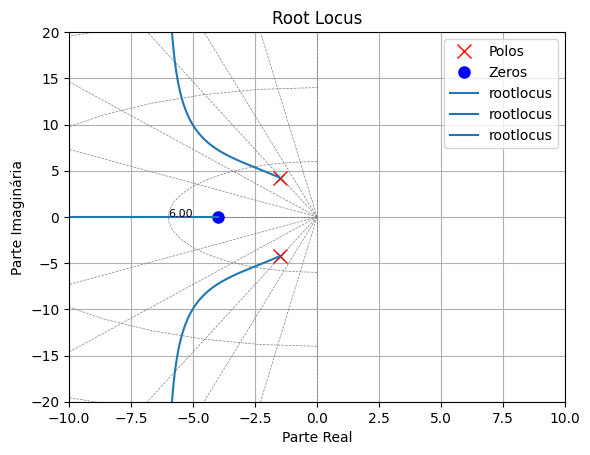


 Polos : 
-13.2488+0.0000j
-1.5006+4.2399j
-1.5006-4.2399j

 Zeros : 
-3.9994+0.0000j


In [14]:
obter_lugar_raizes([70.11, 280.4], [1, 16.25, 59.99, 268])

<font style='font-size: 20px;'> 6. Simule a resposta ao degrau </font> <hr style='line: 2px solid;'>


                  malha fechada c/compensação
RiseTime                              0.0253
SettlingTime                          0.5965
SettlingMin                           0.5289
SettlingMax                           1.6636
Overshoot                            70.9005
Undershoot                            0.0000
Peak                                  1.6636
PeakTime                              0.0657
SteadyStateValue                      0.9734
Erro(%)                               0.0266


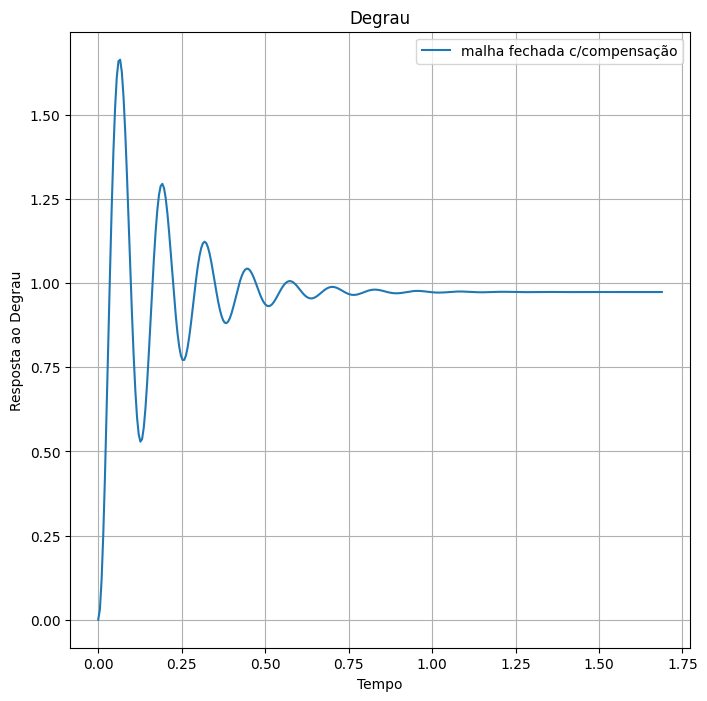

In [19]:
# Construção dos objetos 'TransferFunction'
malha_aberta  = ct.TransferFunction([70.11, 280.4], [1, 16.25, 59.99, 268])
malha_fechada = ct.feedback(35*malha_aberta, 1)

# Plot da resposta ao degrau
obter_plot_degrau({"malha fechada c/compensação":malha_fechada}, amortecimento=0.02)

## <font style='font-size: 30px;'> Análise frequencial — Compensador de avanço </font> <hr style='line: 2px solid;'>

Nosso controlador de avanço será algo do tipo:

$$ C(s) = K_c \frac{Ts+1}{\alpha Ts+1}$$

<font style='font-size: 20px;'> 1. Encontre um ganho para garantir seu erro e verifique se ajustando consegue garantir os requisitos </font> <hr style='line: 2px solid;'>

$$e_{ss} = \frac{1}{1+K_p} → K_p = 49$$

$$ K_c = \frac{K}{K_p} → \frac{1.3885}{49} → \boxed{K_c = 35.2899} $$

Com isso, temos o ganho do nosso compensador. Nosso novo sistema será:



In [20]:
KcG = obter_sistema(zeta=0.3346, wn=4.4971, k=1.3885*35.2899)


         991
---------------------
s^2 + 3.009 s + 20.22

Zeros:
Polos:
-1.5047+4.2379j
-1.5047-4.2379j


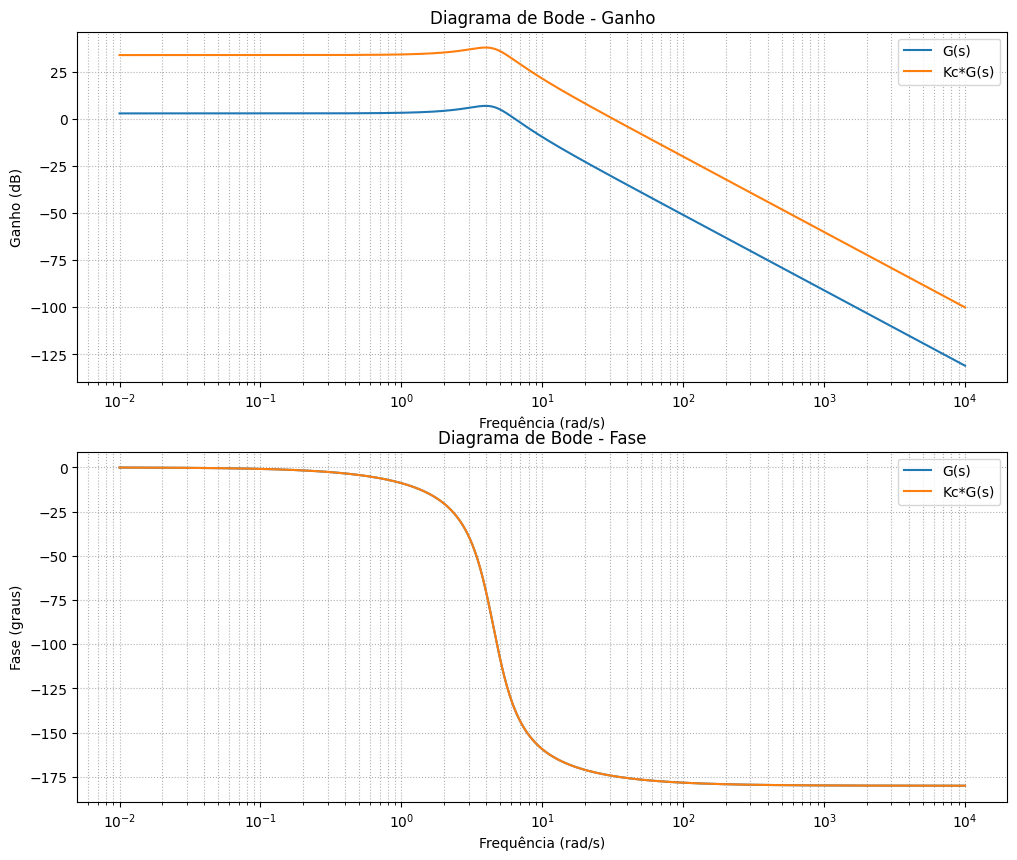

Observando as *margens* do sistema, podemos ver que a frequência de margem de fase é de $\boxed{31.7267 \frac{rad}{s}}$, cuja fase é -174°

Na literatura (*Ogata, 5°Ed, figura 7.91*), podemos ver que o diagrama polar desse tipo de compensador fornece duas relações interessantes para cálculo, a saber:

$\phi_m$, fase máxima:
$$ \sin{\phi_m} = \frac{1-\alpha}{1+\alpha} $$

$\omega_m$, ganho máxima:
$$ |C(j\omega_m)| = \frac{1}{\sqrt{\alpha}} $$

Considerando nosso requisito de fase, $55° -5.5290°+10°=59.5°$, precisamos que $\phi_m=58.5°$. Logo temos:

$$ sen (53°) = 0.0.7986 = \frac{1-\alpha}{1+\alpha} → \boxed{\alpha = 0.0743} $$

Agora, podemos calcular também o máximo de ganho que nosso compensador pode fornecer:

$$ |C(j\omega_m)| = \frac{1}{\sqrt{8.9305}} →  \boxed{|C(j\omega_m)| = 3.6686 dB}$$

Então, o que queremos é que o modulo do sistema seja $|G(j\omega)| = -3.6686 dB$, e vamos buscar a frequência para esse ganho.

Ou seja, nossa nova frequência de corte será $32.2484 \frac{rad}{s}$, pois se o cruzamento for $\omega_m$, o ganho do compesador vai zerar com o ganho do sistema. Para garantir isso, precisamos encontrar o $T$ que faça isso, assim:

$$\omega_m = \frac{1}{\sqrt{\alpha}T} → \boxed{T = 0.0103}$$

Logo nosso compensador será:

In [21]:
Cav = obter_compensador(alpha=0.0743, T=0.0935, kc=35.2899)


3.3 s + 35.29
--------------
0.006947 s + 1

Zeros:
-10.6952+0.0000j
Polos:
-143.9460+0.0000j


In [ ]:
obter_plot_bode({'G(s)':malha_aberta['scipy'], 'Kc*Cav(s)':Cav['scipy'], 'Kc*Cav(s)*G(s)':Kc_Cav_G['scipy']})

## <font style='font-size: 30px;'> Funções </font> <hr style='line: 2px solid;'>

In [23]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import scipy.signal as signal
import numpy as np
import pandas as pd
import control as ct
import scipy as sp
import warnings
import cmath


def obter_conjulgados_dominantes(Mp, Ts, xi=None):
    """
    Função para obter o compensador de avanço de um sistema.
    
    Parâmetros:
    - Mp : sobressinal desejado no caso de sistemas de 1º ordem
    - Ts : tempo de acomodação desejado
    - xi : se for passado, a função ignorará Mp. Usado para sistemas de 2º ordem
    
    Retorno:
    - dois polos complexos e conjulgados que passam nas especificações
    """

    if xi == None:
        xi = -np.log(Mp) / np.sqrt(np.pi**2 + np.log(Mp)**2)
    wn = 4 / (Ts * xi)
    wd = wn * np.sqrt(1 - xi**2)
    pole1 = complex(-xi*wn, wd)
    pole2 = complex(-xi*wn, -wd)
    pole1 = np.round(pole1, decimals=4)  # Arredondar o polo1 para 3 casas decimais
    pole2 = np.round(pole2, decimals=4)  # Arredondar o polo2 para 3 casas decimais
    return [pole1, pole2]


def obter_defasagem_angular_compensador(num, den, s, delta=None):
    """
    Função para obter o compensador de avanço de um sistema.
    
    Parâmetros:
    - num: array numerador do seu sistema
    - den: array denominador do seu sistema
    - s: 1 polo complexo de referência
    - delta(opcional): se for usado, o zero não será posto em baixo do polo, mas será aproximado da origem para acomodar melhor o polo
    
    Retorno:
    - dois polos complexos e conjulgados que passam nas especificações
    """

    # Obter os polos e zeros da função de transferência
    polos = np.roots(den)
    zeros = np.roots(num)

    # Adicionar um polo na origem
    if delta:
        zeros = np.append(zeros, s.real+delta)
    else:
        zeros = np.append(zeros, s.real)

    # Calcular a defasagem angular
    phi = 180
    
    # Calcular contribuição dos polos
    i = 1
    for polo in polos:
        angulo = np.angle(s - polo, deg=True)
        print(f"{i}° Polo, {polo:.4f}, faz {angulo:.1f}° com o S")
        phi -= angulo
        i += 1
    
    # Calcular contribuição dos zeros
    i = 1
    for zero in zeros:
        angulo = np.angle(s - zero, deg=True)
        print(f"{i}° Zero,{zero:.4f}, faz {angulo:.1f}° com o S")
        phi += angulo
        i += 1


    # # Reduzir phi ao intervalo de 0 a 180 graus
    # while phi < 0:
    #     phi += np.pi
    
    # while phi > np.pi:
    #     phi -= np.pi
        
    print(f" \n Polo do compensador precisa somar: {phi:.1f}°")


def obter_compensador_avanco(num, den, s, phi_p, z_c, phi_z=None, k=None):
    """
    Função para obter o compensador de avanço de um sistema.
    
    Parâmetros:
    - k: ganho do seu controlador
    - num: lista dos coeficientes do numerador da função de transferência
    - den: lista dos coeficientes do denominador da função de transferência
    - s: número complexo alvo para referência
    - z: zero do compensador
    - phi_z: ângulo interno que zero do compensador faz com s
    - phi_p: ângulo interno que polo do compensador faz com s
    
    Retorno:
    - prints de compensador, sistema não compensado e sistema compensado.
    
    """

    # encontrar polo
    p_c = (s.imag/np.tan(phi_p*(180/np.pi))) - s.real
    print(f"\n seu polo está em : {(p_c.real):.4f}")
    
    # valorando a função transferência para s
    den_eval = np.polyval(den, s)
    den_eval = np.abs(den_eval)
    num_eval = np.polyval(num, s)
    num_eval = np.abs(num_eval)
    
    # valorando o compensador para s
    num_eval_comp = np.abs(s + np.abs(z_c.real))
    den_eval_comp = np.abs(s + np.abs(p_c.real))

    # verificando condição modular
    k_c = (den_eval_comp * den_eval)/(num_eval_comp * num_eval)
    print(f"\n Você precisa múltiplicar por: {(k_c):.4f} para satisfazer condição de modulo")

    # Construção da função de transferência do controlador PI
    print(k_c)
    compensador = ct.TransferFunction([k_c, k_c*np.abs(z_c.real)], [1, np.abs(p_c.real)])
    sistema = ct.TransferFunction(num, den)
    sistema_compensado = compensador * sistema
    
    # Imprimir a função de transferência do controlador PI
    print(f"\n Seu compensador é : \n {compensador}")
    print(f"\n Sua malha sem controlador é : \n {sistema}")
    print(f"\n Sua malha com controlador é : \n {sistema_compensado}")


def obter_lugar_raizes(num, den):
    
    system = ct.TransferFunction(num, den)
    poles, zeros = ct.pzmap(system, plot=False)
    
    if len(poles) == 0:
        print("Não há polos no sistema.")
        return

    fig, ax = plt.subplots()

    # rlist, klist = ct.root_locus(system, plot=False)
    rlist, klist = ct.root_locus(system, plot=True, ax=ax)

    ax.plot(np.real(poles), np.imag(poles), 'rx', markersize=10, label='Polos')
    ax.plot(np.real(zeros), np.imag(zeros), 'bo', markersize=8, label='Zeros')

    ax.set_xlim([-10, 10])  # Define o limite do eixo x
    ax.set_ylim([-20, 20])  # Define o limite do eixo y

    plt.legend()
    plt.xlabel('Parte Real')
    plt.ylabel('Parte Imaginária')
    plt.grid(True)
    plt.show()

    print("\n Polos : ")
    for polo in poles:
        print(f"{polo:.4f}")
    
    print("\n Zeros : ")
    for zero in zeros:
        print(f"{zero:.4f}")

    #print("\n Ganho crítico (ganho no ponto de ruptura):", np.abs(klist[-1]))


def obter_plot_degrau(transfer_functions, amortecimento=0.02):
    
    fig, ax = plt.subplots(figsize=(8, 8))

    for i, (name, transfer_function) in enumerate(transfer_functions.items()):
        
        # obter resposta ao degrau unitário
        tempo, resposta = ct.step_response(transfer_function)
        ax.plot(tempo, resposta, label=name)

        # obter informações
        info_sistema = ct.step_info(transfer_function, SettlingTimeThreshold=amortecimento)
        df_sistema = pd.DataFrame.from_dict(info_sistema, orient='index', columns=[name])
        df_sistema.index.name = 'Parâmetro'

        # Adicionar erro
        e_ss_atual = float(f"{1 - float(df_sistema.at['SteadyStateValue', name])}")
        df_adicional = pd.DataFrame({name: [e_ss_atual]}, index=['Erro(%)'])
        df_sistema = pd.concat([df_sistema, df_adicional])
        
        # arredondar para 4 decimais
        df_sistema = df_sistema.applymap(lambda x: f'{x:.4f}')
        print(f"\n {df_sistema}")

    ax.set_xlabel('Tempo')
    ax.set_ylabel('Resposta ao Degrau')
    ax.set_title('Degrau')
    ax.grid(True)
    ax.legend()

    # plt.tight_layout()
    plt.show()


def obter_sistema(zeta=None, wn=None, k=None, num=None, den=None):
    if num is not None and den is not None:
        sc_tf = ct.TransferFunction(num, den)
        ct_tf = ct.TransferFunction(num, den)
    elif zeta is not None and wn is not None and k is not None:
        num = [k*wn**2]
        den = [1, 2*zeta*wn, wn**2]
        sc_tf = signal.TransferFunction(num, den)
        ct_tf = ct.TransferFunction(num, den)
    else:
        raise ValueError("É necessário fornecer os coeficientes da função de segunda ordem ou os coeficientes num e den.")

    # gm, pm, wg, wp = ct.margin(ct_tf)
    # df = pd.DataFrame(columns=['Margem de Ganho (dB)', 'Margem de Fase (graus)', 'Frequência de Margem de Ganho (rad/s)', 'Frequência de Margem de Fase (rad/s)'])
    # df.loc['Sistema'] = [gm, pm, wg, wp]
    
    print(ct_tf)
    print("Zeros:")
    zeros = np.round(ct.zero(ct_tf), 4)
    for zero in zeros:
        print(f"{zero.real:+.4f}{zero.imag:+.4f}j")
    print("Polos:")
    polos = np.round(ct.pole(ct_tf), 4)
    for polo in polos:
        print(f"{polo.real:+.4f}{polo.imag:+.4f}j")
    
    # return {"scipy":sc_tf, "control":ct_tf, "dados":df}
    return {"scipy":sc_tf, "control":ct_tf}


def obter_compensador(alpha, T, kc):
    
    num = [kc*T, kc*1]
    den = [alpha * T, 1]
    sc_tf = signal.TransferFunction(num, den)
    ct_tf = ct.TransferFunction(num, den)
    gm, pm, wg, wp = ct.margin(ct_tf)

    df = pd.DataFrame(columns=['Margem de Ganho (dB)', 'Margem de Fase (graus)', 'Frequência de Margem de Ganho (rad/s)', 'Frequência de Margem de Fase (rad/s)'])
    if alpha > 1:   df.loc['Compensador de atraso'] = [gm, pm, wg, wp]
    elif alpha < 1: df.loc['Compensador de avanço'] = [gm, pm, wg, wp]
    else:           df.loc['Não é compensador'] = [gm, pm, wg, wp]
    print(ct_tf)
    print("Zeros:")
    zeros = np.round(ct.zero(ct_tf), 4)
    for zero in zeros:
        print(f"{zero.real:+.4f}{zero.imag:+.4f}j")
    print("Polos:")
    polos = np.round(ct.pole(ct_tf), 4)
    for polo in polos:
        print(f"{polo.real:+.4f}{polo.imag:+.4f}j")

    return {"scipy":sc_tf, "control":ct_tf, "dados":df}


def obter_malha(lista_tf, scipy=False, control=False, close=False):


    if scipy:

        raise ValueError("Função bloqueada, não utilize scipy!")
        # num_total = [1]
        # den_total = [1]

        # for tf in lista_tf:
        #     num_total = np.convolve(num_total, tf.num) # convolui o numerador
        #     den_total = np.convolve(den_total, tf.den) # convolui o denominador

        # tf_scipy = signal.TransferFunction(num_total, den_total) # obtem função objeto função de transferência no scipy
        # tf_control = ct.TransferFunction(num_total, den_total) # obtem função objeto função de transferência no control

    if control:
        tf_control = ct.TransferFunction(1, 1)  # Inicializa a função de transferência da malha como 1 (sistema vazio)
        for tf in lista_tf:
            tf_control *= tf  # Multiplica a função de transferência da malha pelo sistema atual
        tf_scipy = tf_control.returnScipySignalLTI()
        tf_scipy = tf_scipy[0][0]

    if close:
        tf_control = ct.feedback(tf_control)  # Realizar o feedback no objeto do Control
        tf_scipy = tf_control.returnScipySignalLTI()
        tf_scipy = tf_scipy[0][0]
    
    print("Forma padrão:")
    print("**************")
    print(tf_control)

    print("Zeros:")
    zeros = np.round(ct.zero(tf_control), 4)
    for zero in zeros:
        print(f"{zero.real:+.4f}{zero.imag:+.4f}j")
    
    print("Polos:")
    polos = np.round(ct.pole(tf_control), 4)
    for polo in polos:
        print(f"{polo.real:+.4f}{polo.imag:+.4f}j")

    return {'scipy':tf_scipy, 'control':tf_control}




